### Introduction

#### Installation

The pywapor package depends on several other packages, most of them get installed automatically when we install pywapor. The GDAL package needs to be installed manually however. Luckily, it is already installed on the backend computer used by Google Colab. We can verify that GDAL is installed by running the following commands.

In [2]:
from osgeo import gdal
print("Using gdal version", gdal.__version__)

Using gdal version 3.4.1


Now that we know that Python is able to import the GDAL package, we can install pywapor by running the following command.



In [2]:
!pip install pywapor==2.4.1 --quiet

If everything went well, we can now import pywapor in Python, let's try it (fingers crossed)!

In [3]:
import pywapor
print("Using pywapor version:", pywapor.__version__)

Using pywapor version: 2.4.1


#### ETLook Input

In order to run the ETLook model, we first need to collect the necessary inputs. For your convenience, the pywapor package has a function that can collect all this data from selected sources and make sure the data is stored in the correct format. In one of the following lessons we will look at how you can add other datasets to the input.

Because some of the data portals used require a user to login with a username and a password, we first need to set those up. Most importantly, we will need a `NASA Earthdata Login` to be able to collect the MODIS and MERRA2 datasets, which can be created [over here](https://urs.earthdata.nasa.gov/users/new).

> ⚠️
>
> After creating your account, you still need to accept some 'Terms of Use', before you can continue with this notebook. To do that, login to your newly created account and go to
>
> `Applications > Authorized Apps > Approve More Applications`
>
> There, make sure the two following applications are authorized:
> 1. `NASA GESDISC DATA ARCHIVE`
> 2. `LP DAAC Data Pool`
>
> ⚠️

Once you have your account set up, we can enter our username and password by running the following code (if you skip this step, you'll be prompted for your username and password once the script starts downloading any product that requires them).


In [4]:
pywapor.collect.accounts.setup("NASA")

Next, we need a WAPOR API token. To get that token, you need to create an account [here](https://wapor.apps.fao.org/home/WAPOR_2/1) and then go to `My WaPOR > My Profile > API Token`. Once you have the token, we can add it to our pywapor accounts.

In [5]:
pywapor.collect.accounts.setup("WAPOR")

Now that we have our accounts set up we can start defining our period and area-of-interest (AOI). 

First we define a `startdate` and `enddate`, our boundingbox through `latlim` and `lonlim` and we give a `project_folder` in which all our data will be stored. Here I've chosen an period of exactly 10 days which is the default composite length of pyWAPOR. We'll talk more about composites in the next lesson. The given boundingbox will show us the Fayoum irrigation scheme in Egypt.

Note that for `latlim` the first value refers to the southern border of your AOI, so this value should always be smaller than the second. For `lonlim`, the first value refers to the western border of your AOI.

In [6]:
project_folder = r"/Users/hmcoerver/pywapor_notebooks"
startdate = "2021-07-01"
enddate = "2021-07-11"
latlim = [28.9, 29.7]
lonlim = [30.2, 31.2]

Then we can run `pywapor.pre_et_look.main()` to start the downloading.

In [7]:
ds, fh = pywapor.pre_et_look.main(project_folder, startdate, enddate, latlim, lonlim)

> PRE_ET_LOOK
    # ndvi
    --> Downloading MOD13.
Tile: 3 / 3: 100%|██████████| 260M/260M [04:47<00:00, 905kBytes/s] 
    --> Downloading MYD13.
Tile: 1 / 1: 100%|██████████| 247M/247M [03:10<00:00, 1.30MBytes/s]
    --> Resampling resolution is ~205 meter.
    --> Resampling datasets.
    --> Calculating composites.
    # p_24
    --> Downloading CHIRPS.
Tile: 11 / 11: 100%|██████████| 3.03M/3.03M [00:07<00:00, 386kBytes/s]
    --> Resampling datasets.
    --> Calculating composites.
    # se_root
    > PRE_SE_ROOT
        # ndvi
        --> Downloading MOD13.
Tile: 3 / 3: 0.00Bytes [00:00, ?Bytes/s]
        --> Downloading MYD13.
Tile: 1 / 1: 0.00Bytes [00:00, ?Bytes/s]
        --> Resampling resolution is ~205 meter.
        --> Resampling datasets.
        # lst
        --> Downloading MOD11.
Tile: 11 / 11: 100%|██████████| 5.83M/5.83M [00:02<00:00, 2.52MBytes/s]
        --> Downloading MYD11.
Tile: 11 / 11: 100%|██████████| 6.84M/6.84M [00:26<00:00, 259kBytes/s]
        --> Resa

Once you see the output line `< PRE_ET_LOOK`, the code has finished. The function has created a bunch of files in you `project_folder` and returned two variables: `ds` and `fh`. We'll have a look at the folder first.

Using the [`ls` unix command](https://en.wikipedia.org/wiki/Ls), we can see the contents of a folder, and with the asterices we can see the contents of recursive folders. Our `project_folder` now contains the following subdirectories and files.

In [8]:
!ls *

log.txt

RAW:
CHIRPS  GEOS5   MERRA2  MODIS   SRTM    STATICS WAPOR

level_1:
et_look_input.nc  se_root_input.nc  se_root_output    se_root_output.nc


The `project_folder` now contains two directories, `RAW` and `level_1`. In the RAW-folder all the data that was downloaded is stored just as we got it from the different servers. In the level_1-folder, this RAW data has been proprocessed to prepare it for use in ET_Look. The most important file here is called `et_look_input.nc`, this file contains all the data we need to run the model!

Next, let's have a look at the two variables that were returned by the function. `fh` is an abbreveation for 'filehandle', it's simply a string giving the location of the `et_look_input.nc`-file.

In [9]:
print(f"fh is of the type {type(fh)} and its value is: \n \n '{fh}'")

fh is of the type <class 'str'> and its value is: 
 
 '/Users/hmcoerver/pywapor_notebooks/level_1/et_look_input.nc'


The variable called `ds` (which stands for Dataset), is an xarray.Dataset. XArray is an Python-package that let's you work with large multi-dimensional datasets. Let's see what it looks like.

In [10]:
ds

<xarray.Dataset>
Dimensions:       (epoch: 1, lon: 510, lat: 408)
Coordinates:
  * epoch         (epoch) int64 0
  * lon           (lon) float64 30.2 30.2 30.2 30.21 ... 31.19 31.2 31.2 31.2
  * lat           (lat) float64 29.7 29.7 29.7 29.69 ... 28.91 28.9 28.9 28.9
    epoch_starts  (epoch) datetime64[ns] ...
    epoch_ends    (epoch) datetime64[ns] ...
Data variables: (12/32)
    ndvi          (epoch, lat, lon) float32 ...
    p_24          (epoch, lat, lon) float32 ...
    se_root       (epoch, lat, lon) float32 ...
    r0            (epoch, lat, lon) float32 ...
    z             (lat, lon) float32 ...
    land_mask     (epoch, lat, lon) float32 ...
    ...            ...
    z_oro         (lat, lon) float32 ...
    t_diff        (lat, lon) float32 ...
    slope         (lat, lon) float32 ...
    aspect        (lat, lon) float32 ...
    lat_deg       (lat, lon) float32 ...
    lon_deg       (lat, lon) float32 ...
Attributes:
    geotransform:  [ 3.01984737e+01  1.96536998e-03  0.00000000e+00  2.970126...
    projection:    GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137...
    pixel_size:    204.5582318379489
    example_file:  /Users/hmcoerver/pywapor_notebooks/RAW/MODIS/MOD13/NDVI_MO...

The output of calling `ds` is interactive. It contains several parts, at the top you'll see `Dimension`, which gives information about the dimensions of our dataset. In the W-E direction, the dataset contains 510 values, while in the S-N direction 408, i.e. we have 510 * 408 = 208,080 pixels! Finally, there is an `epoch`-dimension, which is of size 1. Remember that we selected a period of 10 days, `pre_et_look` created 1 composite for that period, hence the size of 1 (we'll talk more about this in the next lesson).

Then there is a part called `Data variables`, you might have to click on it to expand its information. Once you do that, you'll see a list of variables for which the data is stored inside the file specified by `fh`. After each variable name, you can see it's dimensions. E.g. `ndvi` is a 3-dimensional variable, while `z` is 2-dimensional. To get more information about a variable, you can click on the little 'paper'-icon at the end of the line. If you look at the info for `ndvi` for example, you should see that `ndvi` stands for "Normalized difference vegetation index", its unit is \[-\] and the data comes from \['MOD13Q1', 'MYD13Q1'\].

Finally, there is a section called `Attributes`, which contains some metadata on this dataset. For example `pixel_size` gives you the size of the pixels in this dataset in meters.

XArray datasets are also easy to plot, for example, we can create a map of `z` like this (Note that XArray is smart enough to automatically fill in the units and the description of the variable!).

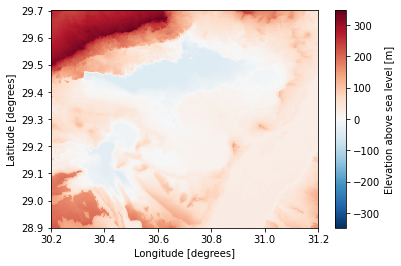

In [12]:
%matplotlib inline
ds.z.plot()

If we want to make a map of a 3-dimensional variable, we'll have to select for which time (i.e. `epoch`) we want to create the map like this.

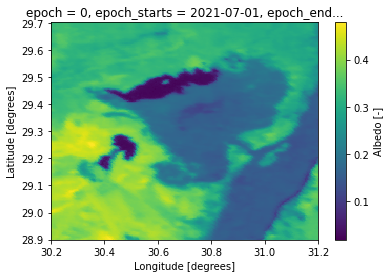

In [13]:
ds.r0.isel(epoch = 0).plot()

If for some reason you have lost the variable `ds` (maybe you restarted you computer) and don't want to run `pre_et_look` again, you can simply open the file specified by `fh` like this.

In [14]:
import xarray as xr
ds = xr.open_dataset(fh)

Above we saw that the `level_1` folder also contains some other ".nc" files than just `et_look_input.nc`. Try opening them with `xr.open_dataset()` and explore their contents!

#### Running ETLook

Now that we have created the input file for the model, we can run the model! We simply pass the `et_look_input.nc` file to `pywapor.et_look.main()`.

In [15]:
ds = pywapor.et_look.main(fh)

--> Running ETLook_v2


--> Saving outputs.


This should go pretty quickly (a couple of seconds). First we'll check our `project_folder` again.

In [16]:
!ls *

log.txt

RAW:
CHIRPS  GEOS5   MERRA2  MODIS   SRTM    STATICS WAPOR

level_1:
et_look_input.nc  se_root_input.nc  se_root_output.nc
et_look_output.nc se_root_output


Looks pretty much the same, except there is now a file called `et_look_output.nc`!



We've also overwritten the variable `ds`. So let's see what is in there now.

In [17]:
ds

<xarray.Dataset>
Dimensions:       (epoch: 1, lon: 510, lat: 408)
Coordinates:
  * epoch         (epoch) int64 0
  * lon           (lon) float64 30.2 30.2 30.2 30.21 ... 31.19 31.2 31.2 31.2
  * lat           (lat) float64 29.7 29.7 29.7 29.69 ... 28.91 28.9 28.9 28.9
    epoch_starts  (epoch) datetime64[ns] ...
    epoch_ends    (epoch) datetime64[ns] ...
Data variables:
    se_root       (epoch, lat, lon) float32 ...
    int_mm        (epoch, lat, lon) float64 ...
    t_24_mm       (epoch, lat, lon) float64 ...
    e_24_mm       (epoch, lat, lon) float64 ...
    et_24_mm      (epoch, lat, lon) float64 ...
    et_ref_24_mm  (epoch, lat, lon) float64 ...
Attributes:
    geotransform:  [ 3.01984737e+01  1.96536998e-03  0.00000000e+00  2.970126...
    projection:    GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137...
    pixel_size:    204.5582318379489
    example_file:  /Users/hmcoerver/pywapor_notebooks/RAW/MODIS/MOD13/NDVI_MO...

As you can see, the `Dimensions` and `Attributes` parts are the same. The `Data variables` however, now contain our output variables. We can plot them in the same way as we did with the input dataset.

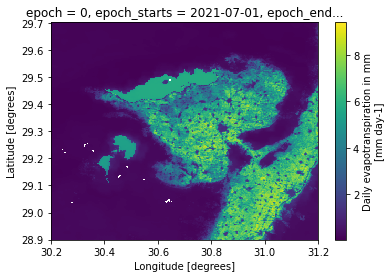

In [18]:
ds.et_24_mm.isel(epoch = 0).plot()

If you want to do some calulcations with the data, you can get easily get a numpy-array (e.g. for et_24_mm).

In [19]:
import numpy as np

et_data = ds.et_24_mm.isel(epoch = 0).values

print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

resolution: (408, 510)
total pixels: 208080
number of pixels with missing data: 159
maximum value: 9.41
minimum value: 0.03
mean: 1.98
median: 0.29


As we could see, the output dataset only contained 6 variables. If you'd want to output all the variables that ET_Look calculated however, you could run `pywapor.et_look.main` like this.

In [20]:
ds = pywapor.et_look.main(fh, export_vars = "all")

--> Running ETLook_v2


--> Saving outputs.


Now `ds` contains all the variables calculated by ET_Look.

In [21]:
list(ds.variables)

['epoch',
 'lon',
 'lat',
 'ndvi',
 'epoch_starts',
 'epoch_ends',
 'p_24',
 'se_root',
 'r0',
 'z',
 'land_mask',
 'rs_min',
 'lue_max',
 'z_obst_max',
 'ra_24',
 't_air_24',
 't_air_min_24',
 't_air_max_24',
 'u2m_24',
 'v2m_24',
 'p_air_0_24',
 'qv_24',
 'lw_offset',
 'lw_slope',
 'r0_bare',
 'r0_full',
 'rn_offset',
 'rn_slope',
 't_amp_year',
 't_opt',
 'vpd_slope',
 'z_oro',
 't_diff',
 'slope',
 'aspect',
 'lat_deg',
 'lon_deg',
 'u_24',
 'doy',
 'sc',
 'decl',
 'iesd',
 'vc',
 'lai',
 'lai_eff',
 'sf_soil',
 'lat_rad',
 'ws',
 'ra_24_toa_flat',
 'trans_24',
 'stress_rad',
 'p_air_24',
 'vp_24',
 'svp_24',
 'vpd_24',
 'stress_vpd',
 'stress_temp',
 'r_canopy_0',
 't_air_k_24',
 'l_net',
 'int_mm',
 'lh_24',
 'int_wm2',
 'rn_24',
 'rn_24_canopy',
 'stress_moist',
 'r_canopy',
 'z_obst',
 'z0m',
 'ra_canopy_init',
 'u_b_24',
 'ad_dry_24',
 'ad_moist_24',
 'ad_24',
 'psy_24',
 'ssvp_24',
 't_24_init',
 'h_canopy_24_init',
 'disp',
 'u_star_24_init',
 't_24',
 't_24_mm',
 'rn_24_soi

Finally, if you'd want to export the data to GeoTIFFS instead of netCDF, you could do the following.

In [22]:
files = pywapor.et_look.main(fh, export_to_tif = True)

--> Running ETLook_v2


--> Saving outputs.


The variable `files` is a dictionary with the paths to the respective tif-files.

In [23]:
files

{'int_mm': ['/Users/hmcoerver/pywapor_notebooks/level_1/int_mm_output/int-mm_-_-_10_2021.07.01.tif'],
 't_24_mm': ['/Users/hmcoerver/pywapor_notebooks/level_1/t_24_mm_output/t-24-mm_-_-_10_2021.07.01.tif'],
 'e_24_mm': ['/Users/hmcoerver/pywapor_notebooks/level_1/e_24_mm_output/e-24-mm_-_-_10_2021.07.01.tif'],
 'et_24_mm': ['/Users/hmcoerver/pywapor_notebooks/level_1/et_24_mm_output/et-24-mm_-_-_10_2021.07.01.tif'],
 'et_ref_24_mm': ['/Users/hmcoerver/pywapor_notebooks/level_1/et_ref_24_mm_output/et-ref-24-mm_-_-_10_2021.07.01.tif'],
 'se_root': ['/Users/hmcoerver/pywapor_notebooks/level_1/se_root_output/se-root_-_-_10_2021.07.01.tif']}